# Creating a Normal Distribution from the Mean of Uniform Variables

## Objectives
    -   Show Similarity Between the Distributions of a Normal Random Variable and the Mean of n Uniform Variables
    -   Give and Derive an Equation that relates the Mean of n Uniform Variables and a Normal Random Variable
    -   Show Confirmation Through Test Results 
    -   Give Implications of the Equation

## Similarity Between Normal and Mean of n Uniform Variables

### Distribution of the Mean of n Uniform Variables

$ X_{i} = Uniform(a, b)$

$ \bar{X} = \frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i} $

Lets simulate distribution of $ \bar{X} $

In [2]:
"""Adding All Necessary Libraries"""
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean, stdev
from sympy import *
from IPython.display import display

In [8]:
"""Variables"""
NUMBER_OF_TRIALS: int = 10000
a: int = 0
b: int = 1
n: int = 13

In [9]:
"""Generating Data"""
data: list = []
for _ in range(0, NUMBER_OF_TRIALS):
    n_random_unifrom_variables: list = np.random.uniform(a,b,n)
    average = mean(n_random_unifrom_variables)
    data.append(average)

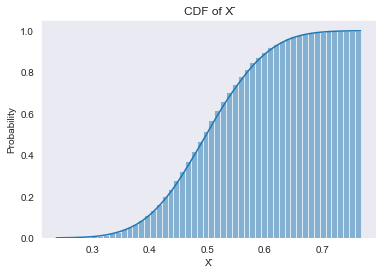

In [10]:
"""Generating CDF of X̄"""
sns.set_style('dark')
plt.xlabel("X̄")
sns.histplot(data, kde=True, stat="probability", cumulative=True).set(title = "CDF of X̄")
plt.show()

### Generating Average CDF of a Normal Random Variable

In [11]:
"""Finding Mean and Standard Deviation of X̄"""
mean_of_X_bar = mean(data)
stdev_of_X_bar = stdev(data)

In [12]:
"""Generating Normal Random Variables with the Same Mean and Standard Deviation of X̄"""
normal_data = np.random.normal(mean_of_X_bar,stdev_of_X_bar,NUMBER_OF_TRIALS)

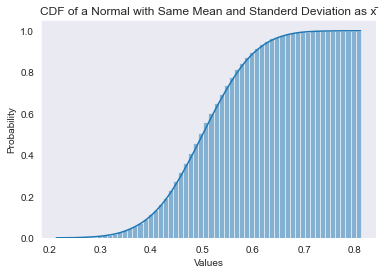

In [13]:
"""Generating CDF of N(mean of X̄, SD of X̄)"""
sns.set_style('dark')
plt.xlabel("Values")
sns.histplot(normal_data, stat="probability", kde=True, cumulative=True).set(title = "CDF of a Normal with Same Mean and Standard Deviation as x̄")
plt.show()

Therefore, since the CDF's appear to be similar, you can generate a normal random variable by taking the mean of n uniform random variables. 

$ \bar{X} = \frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i}$ $\approx$  N(Mean of $\bar{X}$, Standard Deviation of $\bar{X}$)), where $X_{i} = U(a,b)$

## Finding Mean of $\bar{X}$ and Standard Deviation of $\bar{X}$

### Finding Moment Generating Function of $\bar{X}$

Given:

$M_{X_{i}}(t) = \frac{e^{tb} - e^{ta}}{t(b-a)}$

$\bar{X} = \frac{x_{1} + x_{2} + \cdot \cdot \cdot + x_{n}}{n}$

===================

$M_{\bar{X}}(t) = E(e^{t\bar{X}})$

$= E(e^{t(\frac{x_{1} + x_{2} + \cdot \cdot \cdot + x_{n}}{n})})$

$= E(e^{\frac{x_{1}t}{n}})E(e^{\frac{x_{1}t}{n}})\cdot \cdot \cdot E(e^{\frac{x_{n}t}{n}})$

$= [E(e^{\frac{x_{1}t}{n}})]^{n}$

$= [M_{X_{1}}(\frac{t}{n})]^{n}$

$=[\frac{e^{\frac{tb}{n}} - e^{\frac{ta}{n}}}{\frac{t}{n}(b-a)}]^{n}$

$M_{\bar{X}}(t) = [(\frac{n(e^{\frac{tb}{n}} - e^{\frac{ta}{n}})}{t(b-a)}]^{n}$

## Finding $E(\bar{X})$ and $E(\bar{X^{2}})$

In [112]:
"""Calculating First Derivative of the MGF with respect to t at t = 0."""
a, b, n, t = symbols("a b n t")

d_one_mgf = diff( ( (exp(t * b / n) - exp(t * a / n)) / ((t/n) * (b-a)) ) ** n, t)
expected_val_d_one = limit(d_one_mgf, t, 0)
print(f"The E(x̄) is {expected_val_d_one}")

The E(x̄) is a/2 + b/2


In [114]:
"""WARNING: EXECUTING THIS CAN TAKE AROUND 5 MINUTES!"""
"""Calculating Second Derivative of the MGF with respect to t at t = 0."""
d_two_mgf = diff((d_one_mgf), t)
expected_val_d_two = limit(d_two_mgf, t, 0)
print(f"The E(x̄^2) is {expected_val_d_two}")

The E(x̄^2) is (3*a**2*n + a**2 + 6*a*b*n - 2*a*b + 3*b**2*n + b**2)/(12*n)


In [115]:
"""Calculating Standard Deviation = sqrt(E(X^2) - [E(X)]^2)."""
standard_deviation = sqrt(expected_val_d_two - pow(expected_val_d_one,2))
print("Standard Deviation is ... ")
display(standard_deviation)

Standerd Deviation is ... 


sqrt(-(a/2 + b/2)**2 + (3*a**2*n + a**2 + 6*a*b*n - 2*a*b + 3*b**2*n + b**2)/(12*n))

From Previous cell:

$\sigma = \sqrt{\frac{3a^{2}n + a^{2} + 6abn - 2ab + 3b^{2}n + b^{2}}{12n} - \frac{a^{2} + 2ab + b^{2}}{4}}$ 

$= \sqrt{\frac{3a^{2}n + a^{2} + 6abn - 2ab + 3b^{2}n + b^{2} - (3na^{2} + 6nab + 3nb^{2})}{12n}}$

$= \sqrt{\frac{3a^{2}n + a^{2} + 6abn - 2ab + 3b^{2}n + b^{2} - (3na^{2} + 6nab + 3nb^{2})}{12n}}$

$= \sqrt{\frac{a^{2} - 2ab + b^{2}}{12n}}$

$= \sqrt{\frac{(a-b)^{2}}{12n}}$

$\sigma = \frac{\vert{a-b}\vert}{2}{\sqrt{\frac{1}{3n}}}$



## Completing the Formula

Now that we know $E(\bar{X}) = \mu = \frac{a+b}{2}$ and $\sigma = \frac{\vert{a-b}\vert}{2}{\sqrt{\frac{1}{3n}}}$

We can complete the previous formula...

$ \bar{X} = \frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i} \approx N(\frac{a+b}{2}, \frac{\vert{a-b}\vert}{2}{\sqrt{\frac{1}{3n}}}) = N(\mu, \sigma)$, where $X_{i} = U(a,b)$

or alternatively

$ \bar{X} = \frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i} \approx N(\frac{a+b}{2}, \frac{(a-b)^{2}}{12n}) = N(\mu, \sigma^{2})$, where $X_{i} = U(a,b)$





## Verifying Formula

In [15]:
"""Declaring Variables"""
# can change
mu: int = 5
sigma: int = 4

# can change (a < mu)
# as |a| goes to infinity the more normal it will be since Normal distributions have a domain of (-infinity, infinity)
a: int = -35

# do not change
b: int = (2 * mu) - a
n: int = int(pow(a-b,2)/(12*pow(sigma,2)))

In [16]:
"""Generating normal and uniform data"""
normal_data = np.random.normal(mu,sigma,NUMBER_OF_TRIALS)

x_bar_data: list = []

for _ in range(0, NUMBER_OF_TRIALS):
    n_random_unifrom_variables: list = np.random.uniform(a,b,n)
    average = mean(n_random_unifrom_variables)
    x_bar_data.append(average)

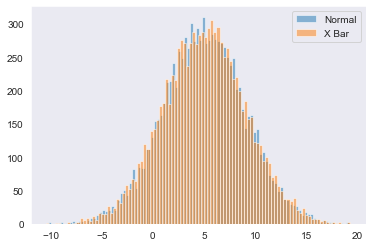

In [17]:
"""Plotting Data"""
plt.hist(normal_data, label="Normal", alpha = .5, bins=100)
plt.hist(x_bar_data, label="X Bar", alpha = .5, bins=100)
plt.legend(loc="best")
plt.show()

In [18]:
print("From Data")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Normal Dist:\nMean: {mean(normal_data)}\nStandard Deviation: {stdev(normal_data)}")
print(f"X bar Dist:\nMean: {mean(x_bar_data)}\nStandard Deviation: {stdev(x_bar_data)}")

From Data
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Normal Dist:
Mean: 4.980874125801122
Standard Deviation: 4.024271369416205
X bar Dist:
Mean: 4.999373827052015
Standard Deviation: 4.04858231672871


## Conclusion

With the formula above you can create a normal variable with the parameters $\mu$ and $\sigma$ by adding n uniform random variables $[U(a,b)]$ and dividing by n, where a = your choice (less than $\mu$), $b = 2\mu - a$, $n = \frac{(a-b)^{2}}{12\sigma^{2}}$)

With the formula you can **not** transform a normal variable into a uniform variable

$ N(\frac{a+b}{2}, \frac{\vert{a-b}\vert}{2}{\sqrt{\frac{1}{3n}}}) \approx \frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i}$

$ \approx \frac{1}{n} (\sum \limits _{i=1} ^ {n-1} (X_{i}) + X_{n})$

$ \approx \frac{1}{n} (\sum \limits _{i=1} ^ {n-1} (X_{i}) + Uniform(a, b))$

$ n[N(\frac{a+b}{2}, \frac{\vert{a-b}\vert}{2}{\sqrt{\frac{1}{3n}}})] \approx [\sum \limits _{i=1} ^ {n-1} (X_{i})] + Uniform(a, b)$

$ n[N(\frac{a+b}{2}, \frac{\vert{a-b}\vert}{2}{\sqrt{\frac{1}{3n}}})] \approx [\sum \limits _{i=1} ^ {n-1} (X_{i})] + Uniform(a, b)$

$Uniform(a, b) \approx n[N(\frac{a+b}{2}, \frac{\vert{a-b}\vert}{2}{\sqrt{\frac{1}{3n}}})] - [\sum \limits _{i=1} ^ {n-1} (X_{i})]$




Originally, I thought you could transform a normal variable into a uniform variable and above was my line of thinking. However, when I tried to test this out in practice, the result was an another normal distribution. The reason being is $[\sum \limits _{i=1} ^ {n-1} (X_{i})]$ is approximately normal (for the same reason $\frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i}$ is approximately normal), so when you subtract it from a normal the result is a normal. Hence, it is a one way function, you can use uniform variables to make a normal variable, but you can not use uniform variables to turn a normal variable into a uniform variable.